-----
# Create a Legend Image for a Network to be displayed in the mLegend.html of the VRNetzer2.0 UI 
## with Zachary's karate Network 
-----

In [97]:
from cartoGRAPHs import * 
import plotly.io as pio 
from PIL import Image 
import io

In [152]:
# Additional Functions: 

def get_trace_nodes_3D_legend(posG, info, color, size, legend_names = None, linewidth=0.0, opac = 0.9):
    '''
    Get trace of nodes for plotting in 3D. 
    Input: 
    - posG = dictionary with nodes as keys and coordinates as values.
    - info = hover information for each node, e.g. a dictionary with node IDs and values = hover information
    - color = a dictionary of key = association name for each color (for legend) and value = hex color  
    - size = a dictionary with node Ids and values=sizes of nodes
    - legend_names = a dictionary with colors as keys and legendname as values
    - linewidth = float; contour of nodes
    - opac = transparency of nodes
    
    Return a trace for plotly graph objects plot including a legend. 
    '''
    
    # dividing traces based on unique colors > for legend
    color_dict = {}
    for i in set(color.values()):
        sublist = []
        for k,v in color.items():
            if v == i: 
                sublist.append(k)
        color_dict[i]= sublist

    d_col_pos = {}
    for i,j_list in color_dict.items(): 
        sub = {}
        for ix,(k,v) in enumerate(posG.items()):
            if k in j_list:
                #sub[ix] = v
                sub[k] = v
            d_col_pos[i] = sub
    d_col_pos_ordered = dict(sorted(d_col_pos.items(),reverse=True))
    #print(d_col_pos_ordered)
    
    # creating traces 
    traces = []
    
    if legend_names is not None and len(legend_names) == len(set(color.values())): 
        for elem,(col, dct) in enumerate(d_col_pos_ordered.items()):

            ids = list(dct.keys())
            coords = list(dct.values())
            
            l_legend_names = []
            for cl,lgname in legend_names.items():
                if cl == col:
                    legend_scattername = lgname
                else:
                    legend_scattername = "Node group"
                l_legend_names.append(legend_scattername)

            l_info_sorted_to_ids = [(info[key]) for key in ids] #{key:info[key] for key in ids}            
            #l_info_sorted_to_ids = list(info_sorted_to_ids.values())

            l_size_sorted_to_ids = [(size[key]) for key in ids] #{key:size[key] for key in ids}
            #l_size_sorted_to_ids = list(size_sorted_to_ids.values())
            
            l_col_sorted_to_ids = [(color[key]) for key in ids]
                                    
            trace = pgo.Scatter3d(x=[i[0] for i in coords],
                                  y=[i[1] for i in coords],
                                  z=[i[2] for i in coords],
                                  mode = 'markers',
                                  text = l_info_sorted_to_ids,
                                  hoverinfo = 'text',
                                       marker = dict(
                            color = l_col_sorted_to_ids, # col,
                            size = l_size_sorted_to_ids,
                            symbol = 'circle',
                            line = dict(width = linewidth,
                                    color = 'dimgrey'),
                            opacity = opac,
                        ),
                    name = l_legend_names[elem] # str(list(d_col_pos_ordered.keys())[c])
                    )
            
            traces.append(trace)
            
        return traces 
    
    else:
        for elem,(col, dct) in enumerate(d_col_pos_ordered.items()):
            
            ids = list(dct.keys())
            coords = list(dct.values())
            
            l_info_sorted_to_ids = [(info[key]) for key in ids] #{key:info[key] for key in ids}            
            #l_info_sorted_to_ids = list(info_sorted_to_ids.values())

            l_size_sorted_to_ids = [(size[key]) for key in ids] #{key:size[key] for key in ids}
            #l_size_sorted_to_ids = list(size_sorted_to_ids.values())
            
            trace = pgo.Scatter3d(x=[i[0] for i in coords],
                                  y=[i[1] for i in coords],
                                  z=[i[2] for i in coords],
                                  mode = 'markers',
                                  text = l_info_sorted_to_ids,
                                  hoverinfo = 'text',
                                       marker = dict(
                            color = col,
                            size = l_size_sorted_to_ids,
                            symbol = 'circle',
                            line = dict(width = linewidth,
                                    color = 'dimgrey'),
                            opacity = opac,
                        ),
                    name = "Group: "+str(elem)
                    )
            traces.append(trace)
        return traces 
    

def get_trace_edges_3D(G, posG, color = '#C7C7C7', opac = 0.1, linewidth=0.25):
    '''
    Get trace of edges for plotting in 3D. 
    Input: 
    - G = Graph
    - posG = dictionary with nodes as keys and coordinates as values.
    - color = string; hex color
    - opac = transparency of edges e.g. 0.2
    
    Return a trace for plotly graph objects plot. 
    '''
    
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in G.edges():
            x0, y0, z0 = posG[edge[0]]
            x1, y1, z1 = posG[edge[1]]
            edge_x.append(x0)
            edge_x.append(x1)
            edge_x.append(None)
            edge_y.append(y0)
            edge_y.append(y1)
            edge_y.append(None)
            edge_z.append(z0)
            edge_z.append(z1)
            edge_z.append(None)
            
    if len(edge_x) < 500: 
        linewidth = 1.0
        opac = 0.5
        
    elif len(edge_x) >= 500 and len(edge_x) < 2000:
        linewidth = 1.0
        opac = 0.35
    
    elif len(edge_x) >= 2000:
        linewidth = 0.75
        opac = 0.1
        
    trace_edges = pgo.Scatter3d(
                                x = edge_x, 
                                y = edge_y, 
                                z = edge_z,
                                mode = 'lines', hoverinfo='none',
                                line = dict(width = linewidth, color = color),
                                opacity = opac,
                                name = "Connections"
                        )
    return trace_edges



def return_3Dfigure(G, posG, 
                  d_features = None, 
                  d_colors = None, 
                  d_size = None, 
                  d_legend  = None, 
                  scheme = 'light', 
                  with_edges = True,
                  plot_title=None, 
                  plot_titlex=None,
                  legend_title=None,
                  annotation=None,
                  legendx=None,
                  legendy=None
                  ):
    
    if d_features == None:
        d_features = dict(zip(list(G.nodes()),list(G.nodes())))
    else:
        pass
    
    if d_colors == None:
        col_pal = 'YlOrRd'
        d_degree = dict(nx.degree(G))
        d_colors = color_nodes_from_dict(G, d_degree, palette = col_pal)
    else: 
        pass 
    
    if d_size == None:
        scale_factor = 0.75
        d_size = dict(draw_node_degree(G, scale_factor))
    else:
        pass
    
    if with_edges == True:
        umap_nodes = get_trace_nodes_3D_legend(posG, d_features, d_colors, d_size, d_legend) 
        umap_edges = get_trace_edges_3D(G, posG)
        data = [umap_edges, *umap_nodes]
    else: 
        umap_nodes = get_trace_nodes_3D_legend(posG, d_features, d_colors, d_size, d_legend) 
        data = [*umap_nodes]
    
    fig = pgo.Figure()
    
    for i in data:
        fig.add_trace(i)

    if scheme == 'dark':    
        fig.update_layout(template='plotly_dark', 
                          showlegend=True, width=1200, height=1200,
                                  scene=dict(
                                      xaxis_title='',
                                      yaxis_title='',
                                      zaxis_title='',
                                      xaxis=dict(nticks=0,tickfont=dict(
                                            color='black')),
                                      yaxis=dict(nticks=0,tickfont=dict(
                                            color='black')),
                                      zaxis=dict(nticks=0,tickfont=dict(
                                            color='black')),
                                    dragmode="turntable"
                                ))  
        
    elif scheme == 'light':
        fig.update_layout(template='plotly_white', 
                          showlegend=True, width=1200, height=1200,
                          scene=dict(
                              xaxis_title='',
                              yaxis_title='',
                              zaxis_title='',
                              xaxis=dict(nticks=0,tickfont=dict(
                                    color='white')),
                              yaxis=dict(nticks=0,tickfont=dict(
                                    color='white')),
                              zaxis=dict(nticks=0,tickfont=dict(
                                    color='white')),    
                            dragmode="turntable"
                        ))    
    else: 
        print('Oops, something went wrong. Please check input parameters.')
    
    fig.update_layout(title_text = plot_title, title_x=plot_titlex, legend_title=legend_title, legend=dict(x=legendx,y=legendy)) #,yanchor="middle",xanchor="left"))
    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False)    
    return fig

_____
# 1 | DEFINE NETWORK
_____

In [130]:
G = nx.karate_club_graph() #nx.scale_free_graph(n=100)

l_nodefeatures = ['nodeID:'+str(i) for i in list(G.nodes())]
d_nodefeatures = dict(zip(G.nodes(),l_nodefeatures))

closeness = nx.closeness_centrality(G)
d_closeness = {}
for node, cl in sorted(closeness.items(), key = lambda x: x[1], reverse = 1):
    d_closeness[node] = round(cl,4)

In [131]:
d_clubs = nx.get_node_attributes(G, "club")
l_clubs_unique = list(set(val for val in d_clubs.values()))

In [132]:
d_clusterlabels = {}
for club in l_clubs_unique:
    subnodelist = []
    for k,v in d_clubs.items():
        if club==v: 
            subnodelist.append(k)
    d_clusterlabels[club] = subnodelist

In [133]:
# node properties
node_properties = ["club "+i+'; '+"nodeID "+str(ix) for ix,i in enumerate(d_clubs.values())]

_____
# 2 | GET NODE POSITIONS e.g. using cartographs structural layout
_____


### Example of Structural Layout

In [134]:
layout_method = 'global'

posG3D = layout_global_umap(G,
                            3,
                            n_neighbors=10, 
                            spread=1, 
                            min_dist=0.1, 
                            metric='cosine'
                            )

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/cartoGRAPHs/cartoGRAPHs.py:181: FutureWarning:

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



____________
# 3 | SPECIFIC VISUAL NODE / EDGE SETTINGS
____________

#### SET NODE COLORS 

In [153]:
d_nodesize = dict(zip(G.nodes(),[6]*len(G.nodes())))

dict_colorparameter = d_clubs #d_closeness 
col_pal = 'Set1'

d_nodecolors = color_nodes_from_dict(G, dict_colorparameter, palette = col_pal)
d_nodecolors_rgba = {}
for k,v in d_nodecolors.items():
    newcol=hex_to_rgb(v)
    rgba=(*newcol,120)
    d_nodecolors_rgba[k]=rgba

d_nodelegend = dict(zip(d_nodecolors.values(),d_clubs.values()))

# 4 - CREATE LEGEND IMAGE

In [154]:
# DECRIPTION OF NETWORK 
network_annot = str("Zachary's Karate Club is a famous network in  <br>"+"social network analysis, consisting of 34 <br>"+
                "members of a university karate club, who were <br>"+"observed over a period of three years. <br>"+
                "The network depicts the friendships and <br>"+"interactions among the club members and was <br>"+
                "initially studied to understand the <br>"+"clubs division into two fractions.")

Image size: 1500 x 1500


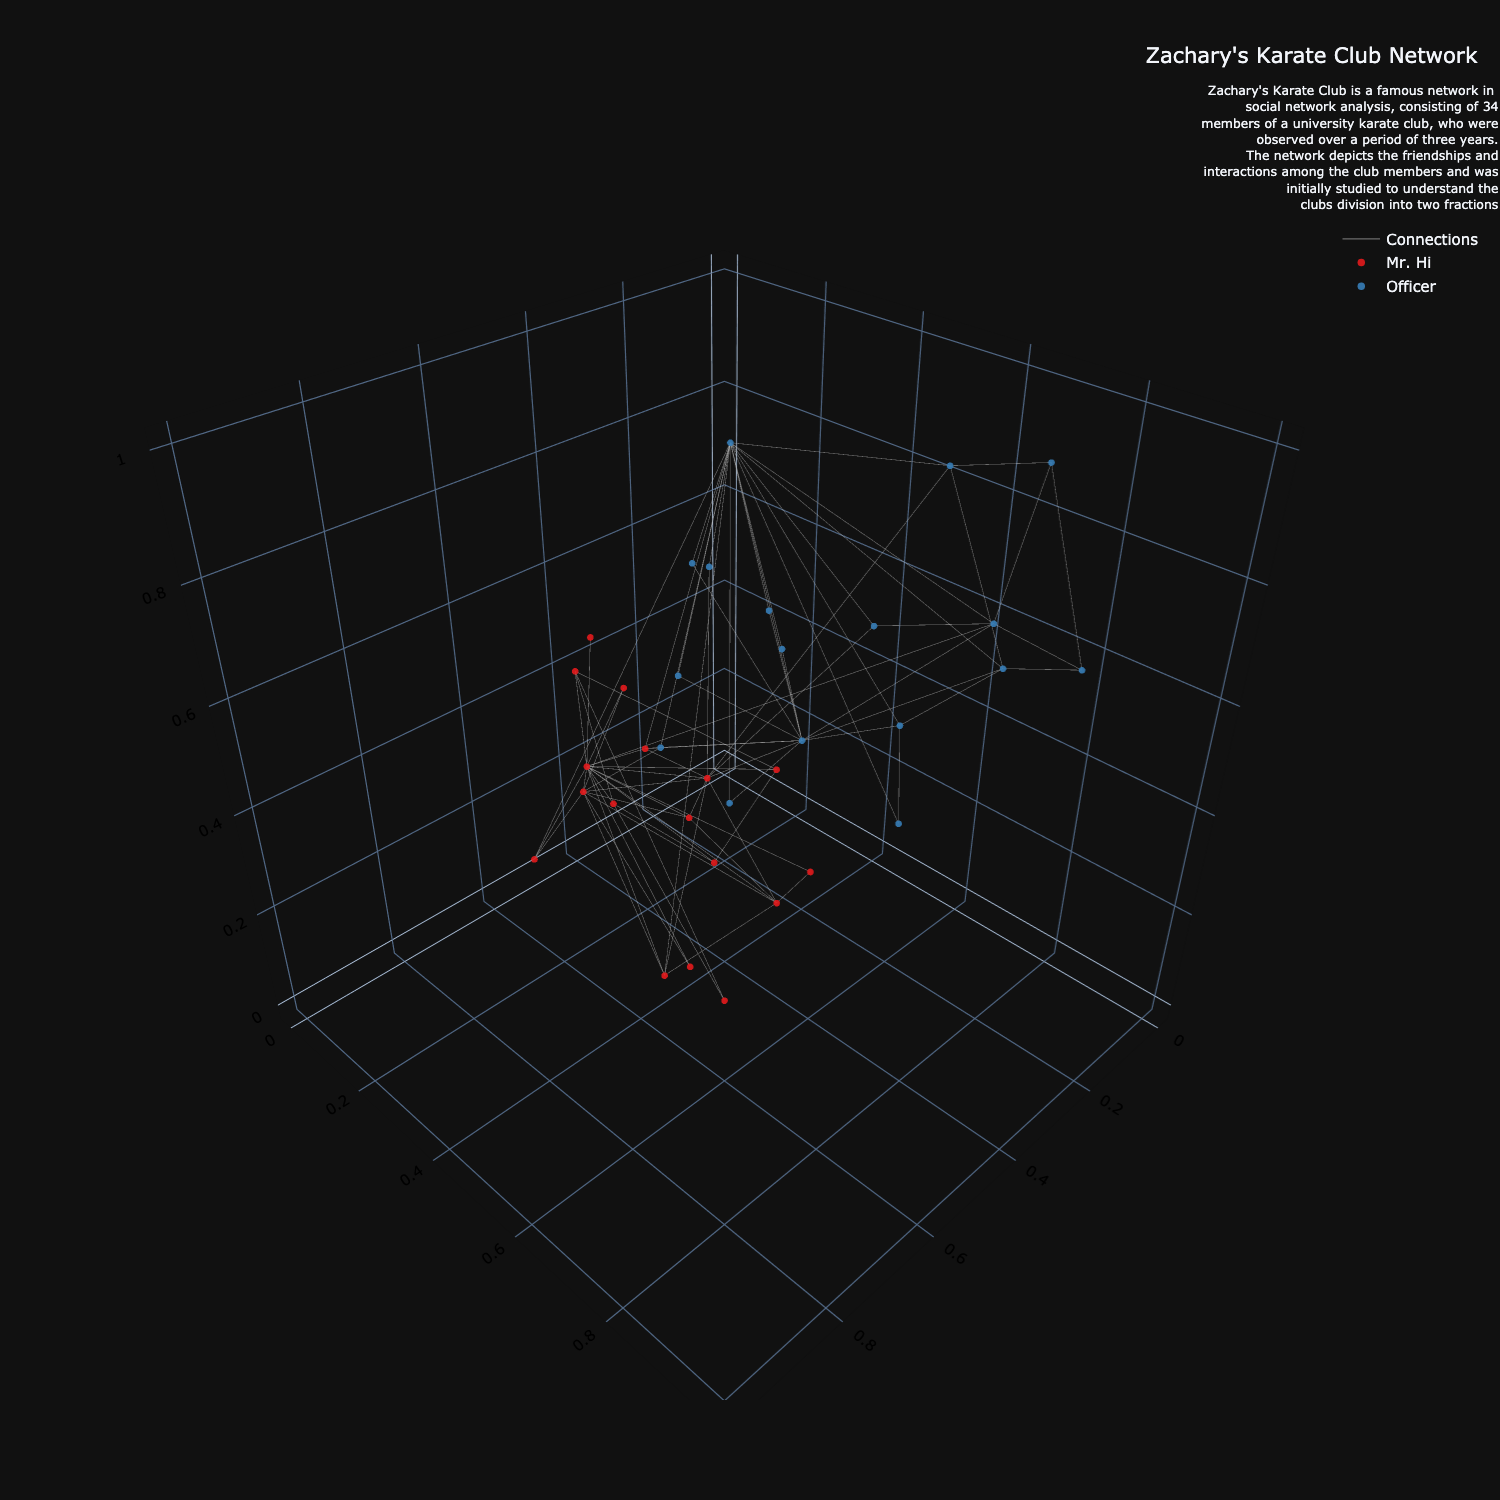

In [155]:
# DRAW FIGURE WITH lEGEND
figure = return_3Dfigure(G, posG3D, 
              d_features = d_nodefeatures, 
              d_colors = d_nodecolors, 
              d_size = d_nodesize, 
              d_legend = d_nodelegend,
              scheme = 'dark',
              with_edges = True,
              plot_title="Zachary's Karate Club Network", plot_titlex=0.985, # position of plot title 
              legendx=0.99, legendy=0.925 # this has to be adjusted depending on text length / paragraph
             )

# LEGEND POSITION
figure.add_annotation(text=network_annot, showarrow=False, 
                      x=1.125,y=1.035, # this has to be adjusted depending on text length / paragraph
                      align="right",
                      font=dict(size=10)
                      )

dpi_scaling = 1.25
image_bytes = pio.to_image(figure, format='png',scale=dpi_scaling) # scale refers to quality output of image e.g.imagesize * scale = pixels
img = Image.open(io.BytesIO(image_bytes))
width,height = img.size
print("Image size: {} x {}".format(width, height))
img


In [156]:
# crop image to get only legend 

# TO DO : area  depends on size of legend(i.e. how many groups, text etc..) -> automate selection of crop somehow?
area = (dpi_scaling*900,dpi_scaling*20,dpi_scaling*1200,dpi_scaling*250) # x start ,y start, x end ,y end
cropped_img = img.crop(area)

cropped_img.save("output/legend.png")

In [157]:
width,height = cropped_img.size
print("Legend Image size: {} x {}".format(width, height))

Legend Image size: 375 x 287
